In [2]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [7]:
x_set = np.array([1, 2, 3, 4, 5, 6])
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0
        
X = [x_set, f]

prob = np.array([f(x_k) for x_k in x_set])
dict(zip(x_set, prob))

{np.int64(1): 0.048,
 np.int64(2): 0.095,
 np.int64(3): 0.143,
 np.int64(4): 0.190,
 np.int64(5): 0.238,
 np.int64(6): 0.286}

In [25]:
np.all(prob >= 0)

np.True_

In [26]:
np.sum(prob)

1.000

In [27]:
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [28]:
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{np.int64(7): 0.095,
 np.int64(9): 0.143,
 np.int64(11): 0.190,
 np.int64(13): 0.238,
 np.int64(15): 0.286,
 np.int64(17): 0.333,
 np.int64(19): 0.381,
 np.int64(21): 0.429,
 np.int64(23): 0.476,
 np.int64(25): 0.524,
 np.int64(27): 0.571}

In [30]:
x_set = np.arange(2, 13)
y_set = np.arange(1, 7)

In [31]:
def f_XY(x, y):
    if 1 <=  y <= 6 and 1 <= x-y <= 6:
        return y * (x - y) / 441
    else:
        return 0

In [32]:
XY = [x_set, y_set, f_XY]

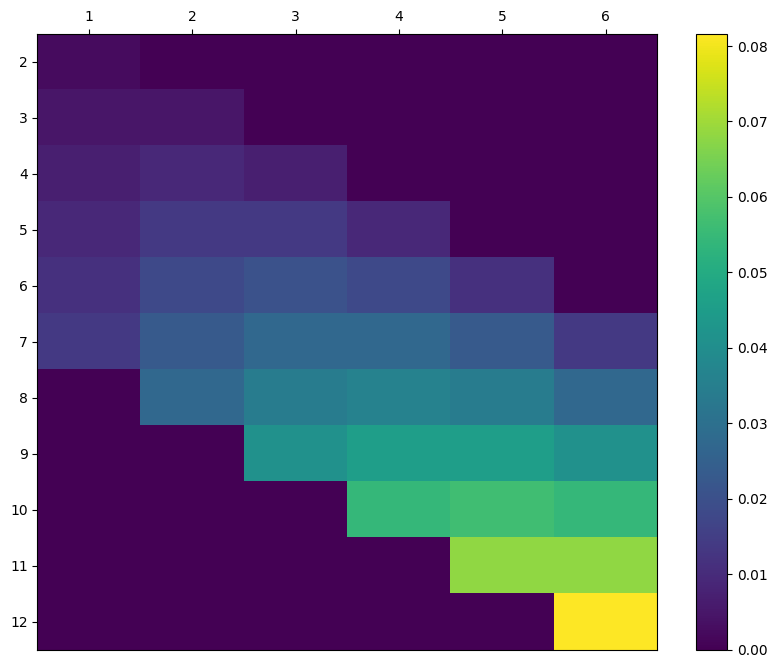

In [33]:
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set]
                for x_i in x_set])

fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)

ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor = False)
ax.set_xticklabels(np.arange(1, 7), minor = False)
ax.set_yticklabels(np.arange(2, 13), minor = False)

ax.invert_yaxis()
ax.xaxis.tick_top()

fig.colorbar(c, ax = ax)

plt.show()

In [34]:
np.all(prob >= 0)

np.True_

In [35]:
np.sum(prob)

1.000

In [53]:
def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

In [54]:
def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [55]:
X = [x_set, f_X]
Y = [y_set, f_Y]

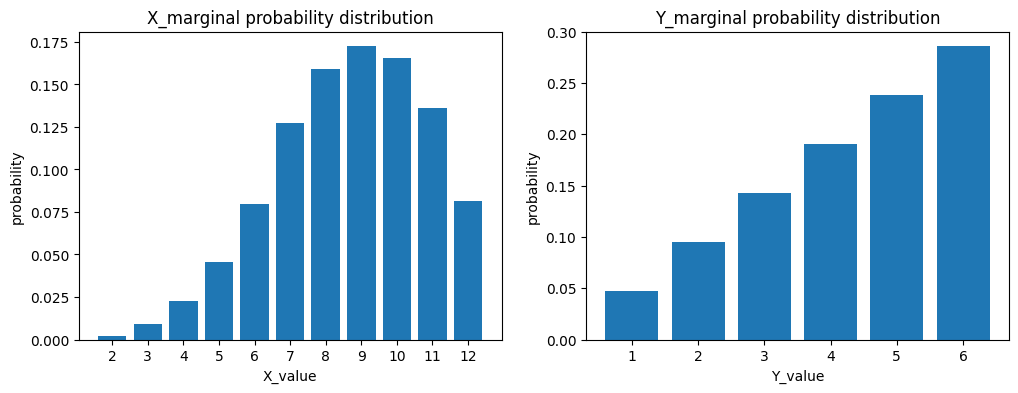

In [56]:
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize = (12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title('X_marginal probability distribution')
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title('Y_marginal probability distribution')
ax2.set_xlabel('Y_value')
ax2.set_ylabel('probability')

plt.show()

In [57]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [58]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

In [59]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [60]:
mean_Y = E(XY, lambda x, y: y)
mean_Y

4.333

In [61]:
a, b = 2, 3

In [63]:
E(XY, lambda x, y: a * x + b * y)

30.333

In [64]:
a * mean_X + b * mean_Y

30.333

In [68]:
np.sum([(x_i - mean_X) ** 2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

4.444

In [71]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j) - mean) ** 2 * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

In [72]:
var_X = V(XY, g = lambda x, y: x)
var_X

4.444

In [73]:
var_Y = V(XY, g = lambda x, y: y)
var_Y

2.222

In [75]:
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j)
        for x_i in x_set for y_j in y_set])

In [76]:
cov_xy = Cov(XY)
cov_xy

2.222

In [77]:
V(XY, lambda x, y: a * x + b * y)

64.444

In [79]:
a ** 2 * var_X + b ** 2 * var_Y + 2 * a * b * cov_xy

64.444

In [80]:
cov_xy / np.sqrt(var_X * var_Y)

0.707